#### [ 물꼬기 ]

[ 개발 주제 : 길이에 따른 생선 무게 예측 모델 ]
- 데이터셋 : fish.csv
 * 피쳐/특성/데이터 : 길이 
 * 타겟/정답/레이블 : 무게 
- 학습종류 : 지도학습 - 회귀
- 알고리즘 : 데이터셋 분석 후 결정 

In [111]:
# [1-1] 모듈 로딩
from sklearn.linear_model import LinearRegression                       # 머신러닝 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error     # 성능평가 모듈 
from sklearn.model_selection import train_test_split                    # 데이터셋 분리 모듈
import matplotlib.pyplot as plt 
import pandas as pd 

In [112]:
# [1-2] 데이터 준비
# 농어 무게/길이 데이터 

# 앞 뒤 바로 삭제 
# 1,2 행만 사용 
fish_df = pd.read_csv('fish.csv', skiprows = 73, header = None, skipfooter = 31, engine='python', usecols=[1,2])   

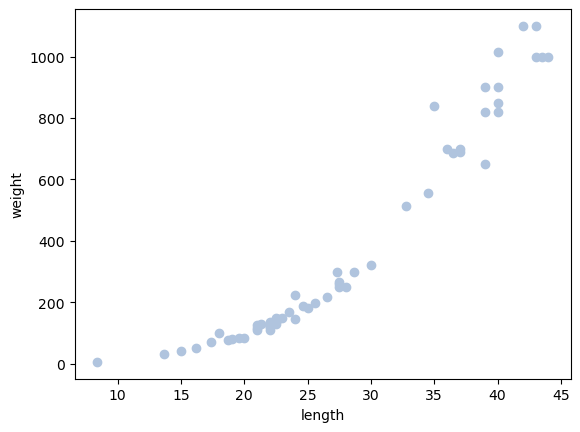

In [113]:
# [1-3] 탐색적 분석 - 시각화 
length = fish_df[2]
weight = fish_df[1]
plt.plot(length, weight, 'o', color='#B0C4DE')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형회귀 모델 선정!


In [114]:
# [2-1] 데이터셋 준비 => 학습용, 검증용, 테스트용 
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 전체 데이터셋에서 학습용 / 테스트용 분리 (70:30 or 80:20)
featureDF = fish_df[[2]] # 2차원
targetSR = fish_df[1]    # 1차원 

In [115]:
# 학습용 : 테스트용 = 70:30 
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

In [116]:
# 학습용 : 검증용 = 80:20
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

In [117]:
# [2-2] 선형회귀 알고리즘 객체 / 인스턴스 생성 
fish_model = LinearRegression()

In [118]:
# [2-3] 학습 진행
fish_model.fit(x_train, y_train)


LinearRegression()

In [119]:
# [2-4] 선형식의 모델 파라미터 확인
print(f'기울기/가중치 : {fish_model.coef_}, 절편값 : {fish_model.intercept_}')

기울기/가중치 : [36.16799332], 절편값 : -624.9817944512461


# 학습 평가

In [120]:
# [3-1] 모델 성능 평가 : 검증 데이터가 필요함 
# 결과값 : 0.0 ~ 1.0 
# 분석 : 1.0에 가까울 수록 성능이 좋음 

score = fish_model.score(x_val, y_val)

print(f'모델 성능평가 점수 : {fish_model.score(x_val, y_val)}')


모델 성능평가 점수 : 0.9062891610089505


In [121]:
# [3-2] 손실 계산 : 검증용 데이터셋으로 예측값 추출 => 손실계산 
pre_y = fish_model.predict(x_val)

mse = mean_squared_error(y_val, pre_y)
mae = mean_absolute_error(y_val, pre_y)

print(mse)  
print(mae)

16438.567954131915
111.86542723055426


In [122]:
# [4-1] 테스트용 데이터셋으로 진행
pre_y = fish_model.predict(x_test)

print(f'예측길이 : {pre_y}')

예측길이 : [362.40442312 -39.06030271 369.63802178 279.21803849 196.03165386
 170.71405854 785.56994494 -82.46189469 224.96604851 264.75084116
 387.72201844 561.32838637 188.7980552  413.03961377  62.21007858
  51.35968059 713.2339583 ]
